In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data = data.drop(['Name','PassengerId','Ticket','Cabin'], axis=1)

In [6]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data_ohc = data.copy()
categorical_cols = ['Sex']
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    data_ohc = data_ohc.drop(col, axis=1)

    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
    print(col_names)
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

['Sex_0', 'Sex_1']


C:\Users\91967\AppData\Local\Temp\ipykernel_27948\465893240.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat = le.fit_transform(data_ohc[col]).astype(np.int)


In [10]:
data_ohc

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_0,Sex_1
0,0,3,22.0,1,0,7.2500,S,0.0,1.0
1,1,1,38.0,1,0,71.2833,C,1.0,0.0
2,1,3,26.0,0,0,7.9250,S,1.0,0.0
3,1,1,35.0,1,0,53.1000,S,1.0,0.0
4,0,3,35.0,0,0,8.0500,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,Q,1.0,0.0
886,0,2,27.0,0,0,13.0000,S,0.0,1.0
887,1,1,19.0,0,0,30.0000,S,1.0,0.0
889,1,1,26.0,0,0,30.0000,C,0.0,1.0


<AxesSubplot: xlabel='Embarked'>

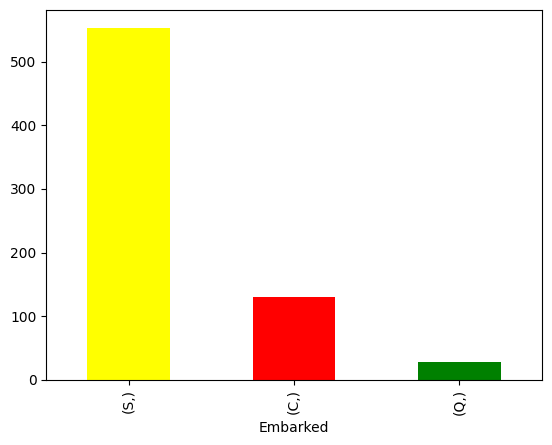

In [11]:
data_ohc.iloc[:, -3:-2].value_counts().plot.bar(color=['yellow', 'red', 'green'])

In [12]:
X_raw = data_ohc.drop(['Embarked'],axis=1)
y_raw = data_ohc['Embarked']

In [13]:
y_raw.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [14]:
scaler = MinMaxScaler()
# Scaling the raw input features
X = scaler.fit_transform(X_raw)
print(f"The range of feature inputs are within {X.min()} to {X.max()}")


The range of feature inputs are within 0.0 to 1.0


In [15]:
y = le.fit_transform(y_raw.values.ravel())

In [16]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([130,  28, 554], dtype=int64))

In [17]:
model = LogisticRegression()

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [19]:
penalty= 'l1'
multi_class = 'multinomial'
solver = 'saga'
max_iter = 1000
l1_model = LogisticRegression(random_state=42, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [20]:
penalty= 'l2'
multi_class = 'multinomial'
solver = 'lbfgs'
max_iter = 1000
l2_model = LogisticRegression(random_state=42, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [21]:
l1_model.fit(X_train,y_train)
l2_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [22]:
l1_preds = l1_model.predict(X_test)
l2_preds = l2_model.predict(X_test)

In [23]:
accuracy_score(y_test, l1_preds)

0.7762237762237763

In [24]:
accuracy_score(y_test, l2_preds)

0.7692307692307693

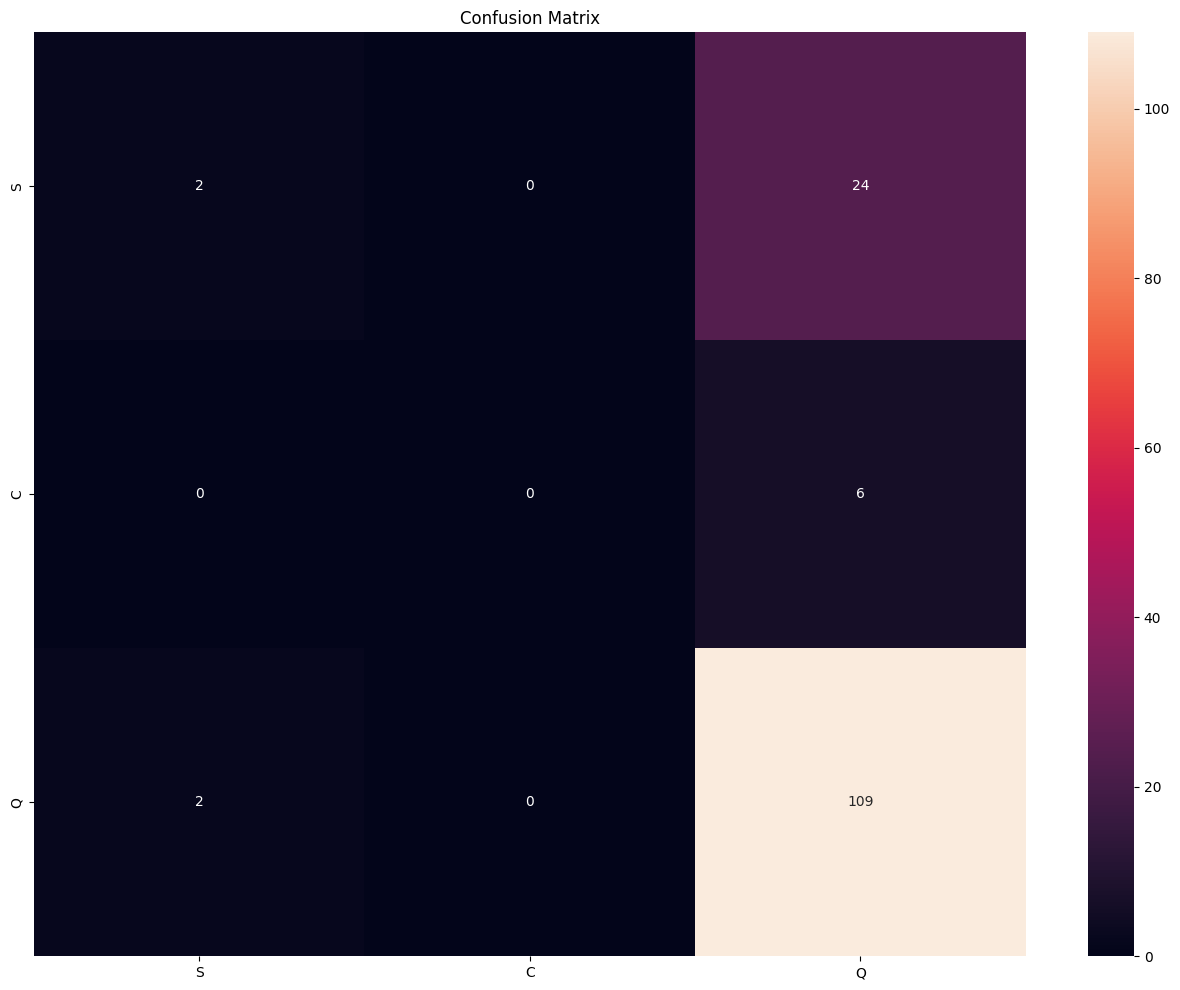

In [25]:
cf = confusion_matrix(y_test, l1_preds)
plt.figure(figsize=(16, 12))
ax = sea.heatmap(cf, annot=True, fmt="d", xticklabels=["S", "C","Q"], 
                 yticklabels=["S", "C", "Q"])
ax.set(title="Confusion Matrix");